# Notebook Initialization 
This section handles all the necessary importing of libraries, modules and packages to ensure the successful compilation of this notebook. 

## Library Importing

In [ ]:
### Importing Libraries

# Data Handling
import pandas as pd                     # For dataframe setup and manipulation
import numpy as np                      # For Numerical computations

# Visualizations
import matplotlib.pyplot as plt         # For plotting visuals
import seaborn as sns                   # For beautifying visuals

# Debugging and Timing 
import time                             # For timing the execution of cells that take a while to run  

# Other
from datetime import datetime           # For manipulation of datetime variables. 

# Notebook Preferences
from IPython.core.display import display, HTML                          # 
display(HTML("<style>.container { width:88% !important; }</style>"))    # For adjusting jupyter notebook width in browserr
pd.set_option('display.max_columns', None)                              # Show all columns in any displayed df

## Kaggle API Connection

In [14]:
# Access Kaggle API

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

# Retreieve NHL Data from https://www.kaggle.com/martinellis/nhl-game-data
api.dataset_download_files('martinellis/nhl-game-data')

# Data Collection

Below, we can see the table relationships established by this kaggle database

![table_relationships.JPG](table_relationships.JPG "gini1")

In [145]:
df_game=pd.read_csv('nhl-game-data/game.csv')
df_team_stats=pd.read_csv('nhl-game-data/game_teams_stats.csv')
df_game_plays=pd.read_csv('nhl-game-data/game_plays.csv')
df_game_goals=pd.read_csv('nhl-game-data/game_goals.csv')

C:\Users\alexa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Eploration

In [57]:
# Explore number of games played by season. How far back does the data go - and are there any outlier seasons ie) lockout years to keep in mind?
for season in df_game.season.unique():
    print("Number of games played in " + str(season) + ": " + str(len(df_game[df_game['season'] == season])))

Number of games played in 20162017: 1323
Number of games played in 20172018: 1363
Number of games played in 20152016: 1321
Number of games played in 20142015: 1319
Number of games played in 20132014: 1323
Number of games played in 20122013: 806
Number of games played in 20112012: 1316
Number of games played in 20102011: 1319
Number of games played in 20092010: 1230
Number of games played in 20082009: 1230
Number of games played in 20072008: 1230
Number of games played in 20062007: 1230
Number of games played in 20022003: 1230
Number of games played in 20032004: 1230
Number of games played in 20052006: 1230
Number of games played in 20002001: 1230
Number of games played in 20012002: 1230
Number of games played in 20192020: 2425
Number of games played in 20182019: 2720


In [247]:
# Joing Game table with Game Stats
df = df_team_stats.merge(df_game, how='inner', on='game_id')

In [248]:
# Drop any duplicate Records
df = df.drop_duplicates()

In [249]:
df_2000 = df[df['season'] == 20112012]

In [251]:
df_2000_1 = df_2000[df_2000['team_id'] == 1]
df_2000_1 = df_2000_1[df_2000_1['type'] == 'R'] # Only regular season games and only 
df_2000_1

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
13955,2011020406,1,home,True,OT,Peter DeBoer,4.0,31.0,14.0,24.0,5.0,0.0,47.5,2.0,3.0,6.0,right,20112012,R,2011-12-09T00:00:00Z,9,1,4,5,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
13988,2011020257,1,away,True,REG,Peter DeBoer,5.0,21.0,22.0,8.0,4.0,1.0,46.3,9.0,8.0,13.0,right,20112012,R,2011-11-17T00:30:00Z,1,7,5,3,away win REG,left,First Niagara Center,/api/v1/venues/null,America/New_York,-4,EDT
13992,2011020630,1,away,True,OT,Peter DeBoer,2.0,25.0,13.0,10.0,2.0,1.0,49.0,9.0,6.0,26.0,right,20112012,R,2012-01-12T02:00:00Z,1,22,2,1,away win OT,left,Rexall Place,/api/v1/venues/null,America/Edmonton,-6,MDT
14038,2011020355,1,away,False,REG,Peter DeBoer,1.0,19.0,19.0,21.0,4.0,0.0,36.2,5.0,5.0,10.0,left,20112012,R,2011-12-01T02:30:00Z,1,21,1,6,home win REG,right,Pepsi Center,/api/v1/venues/null,America/Denver,-6,MDT
14069,2011020222,1,home,False,REG,Peter DeBoer,1.0,33.0,21.0,8.0,5.0,0.0,52.2,2.0,4.0,5.0,right,20112012,R,2011-11-12T00:00:00Z,15,1,3,1,away win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18415,2011021217,1,home,True,REG,Peter DeBoer,4.0,35.0,14.0,4.0,3.0,2.0,51.0,10.0,15.0,10.0,right,20112012,R,2012-04-07T19:00:00Z,9,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
18529,2011020461,1,home,True,REG,Peter DeBoer,6.0,31.0,14.0,8.0,2.0,0.0,44.4,3.0,8.0,3.0,right,20112012,R,2011-12-17T01:00:00Z,25,1,3,6,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
18544,2011020838,1,away,True,REG,Peter DeBoer,4.0,31.0,9.0,4.0,7.0,2.0,50.9,11.0,5.0,12.0,right,20112012,R,2012-02-15T00:00:00Z,1,7,4,1,away win REG,left,First Niagara Center,/api/v1/venues/null,America/New_York,-4,EDT
18662,2011020101,1,away,False,REG,Peter DeBoer,1.0,24.0,22.0,12.0,2.0,0.0,44.0,2.0,0.0,21.0,right,20112012,R,2011-10-22T23:00:00Z,1,5,1,4,home win REG,left,CONSOL Energy Center,/api/v1/venues/null,America/New_York,-4,EDT


In [252]:
df_2000_1 = df_2000_1[['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'goals',
       'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals',
       'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked',
       'startRinkSide', 'season', 'type', 'date_time_GMT', 'away_team_id',
       'home_team_id', 'away_goals', 'home_goals', 'outcome',
        ]]

In [253]:
df_sort = df_2000_1.sort_values('date_time_GMT')

In [254]:
df_sort

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome
15615,2011020012,1,home,False,REG,0.0,20.0,20.0,41.0,5.0,0.0,60.0,7.0,8.0,11.0,right,20112012,R,2011-10-08T23:00:00Z,4,1,3,0,away win REG
16275,2011020026,1,home,True,REG,4.0,26.0,12.0,14.0,5.0,1.0,50.0,3.0,5.0,10.0,right,20112012,R,2011-10-10T17:00:00Z,12,1,2,4,home win REG
17049,2011020037,1,home,True,OT,1.0,37.0,22.0,2.0,2.0,0.0,54.2,5.0,9.0,16.0,right,20112012,R,2011-10-13T23:00:00Z,26,1,1,2,home win OT
16900,2011020057,1,away,True,OT,2.0,41.0,12.0,16.0,5.0,1.0,44.8,9.0,5.0,10.0,right,20112012,R,2011-10-16T00:00:00Z,1,18,3,2,away win OT
17063,2011020091,1,home,False,OT,3.0,19.0,6.0,15.0,4.0,1.0,40.9,14.0,2.0,7.0,right,20112012,R,2011-10-21T23:00:00Z,28,1,4,3,away win OT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18205,2011021156,1,home,True,REG,6.0,38.0,20.0,6.0,4.0,1.0,68.4,12.0,11.0,3.0,right,20112012,R,2012-03-29T23:00:00Z,14,1,4,6,home win REG
15696,2011021173,1,away,True,REG,5.0,31.0,7.0,8.0,4.0,1.0,46.2,5.0,7.0,11.0,left,20112012,R,2012-03-31T23:00:00Z,1,12,5,0,away win REG
15099,2011021191,1,home,True,REG,3.0,20.0,22.0,5.0,4.0,1.0,40.9,7.0,7.0,11.0,right,20112012,R,2012-04-03T23:00:00Z,2,1,1,3,home win REG
17746,2011021208,1,away,True,REG,2.0,21.0,16.0,2.0,2.0,0.0,53.2,8.0,6.0,12.0,left,20112012,R,2012-04-05T23:30:00Z,1,17,2,1,away win REG


In [256]:
# Create list that contains that game id's of interest, this will be used when pulling stats from other tables
games_of_interest = df_sort['game_id'].unique()

# Create "goals against" conditional column
df_sort['goals_against'] = np.where(df_sort['home_team_id'] == 1,df_sort['away_goals'],df_sort['home_goals'])
df_sort

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,goals_against
15615,2011020012,1,home,False,REG,0.0,20.0,20.0,41.0,5.0,0.0,60.0,7.0,8.0,11.0,right,20112012,R,2011-10-08T23:00:00Z,4,1,3,0,away win REG,3
16275,2011020026,1,home,True,REG,4.0,26.0,12.0,14.0,5.0,1.0,50.0,3.0,5.0,10.0,right,20112012,R,2011-10-10T17:00:00Z,12,1,2,4,home win REG,2
17049,2011020037,1,home,True,OT,1.0,37.0,22.0,2.0,2.0,0.0,54.2,5.0,9.0,16.0,right,20112012,R,2011-10-13T23:00:00Z,26,1,1,2,home win OT,1
16900,2011020057,1,away,True,OT,2.0,41.0,12.0,16.0,5.0,1.0,44.8,9.0,5.0,10.0,right,20112012,R,2011-10-16T00:00:00Z,1,18,3,2,away win OT,2
17063,2011020091,1,home,False,OT,3.0,19.0,6.0,15.0,4.0,1.0,40.9,14.0,2.0,7.0,right,20112012,R,2011-10-21T23:00:00Z,28,1,4,3,away win OT,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18205,2011021156,1,home,True,REG,6.0,38.0,20.0,6.0,4.0,1.0,68.4,12.0,11.0,3.0,right,20112012,R,2012-03-29T23:00:00Z,14,1,4,6,home win REG,4
15696,2011021173,1,away,True,REG,5.0,31.0,7.0,8.0,4.0,1.0,46.2,5.0,7.0,11.0,left,20112012,R,2012-03-31T23:00:00Z,1,12,5,0,away win REG,0
15099,2011021191,1,home,True,REG,3.0,20.0,22.0,5.0,4.0,1.0,40.9,7.0,7.0,11.0,right,20112012,R,2012-04-03T23:00:00Z,2,1,1,3,home win REG,1
17746,2011021208,1,away,True,REG,2.0,21.0,16.0,2.0,2.0,0.0,53.2,8.0,6.0,12.0,left,20112012,R,2012-04-05T23:30:00Z,1,17,2,1,away win REG,1


In [257]:
# Calculating 5v5 and Special Teams Goals FOR

# Create filtered dataframe containing only columns desired to merge
df_game_plays_id = df_game_plays[['play_id','game_id','team_id_for','event']]

# Merge with Goals df to identify shorthanded goal information. 
df_goals = df_game_goals.merge(df_game_plays_id, how = 'left', on = 'play_id')

# Filter by team for (team 1)
df_goals1 = df_goals[df_goals['team_id_for'] == 1]

# Filter using the "games_of_interest" variable so that we are looking at the specific season of interest
boolean_series = df_goals1.game_id.isin(games_of_interest)
filtered_df = df_goals1[boolean_series]

# Sort dataframe by ascending game_id
df_goal_info = filtered_df.sort_values('game_id')

# Use get dummies to categories the number of goals for each type of strength ie "even", "powerplay" etc.
df_goal_info = pd.get_dummies(df_goal_info, columns = ['strength'])

# Use pandas Groupby to find the sum of each type of goal per game
df_goal_info = df_goal_info.groupby('game_id').sum()
df_goal_info

,team_id_for,strength_Even,strength_Power Play,strength_Short Handed
game_id,,,,
2011020026,4.0,3,1,0
2011020037,3.0,3,0,0
2011020057,4.0,3,1,0
2011020091,4.0,2,1,1
2011020101,1.0,0,0,1
...,...,...,...,...
2011021156,6.0,4,1,1
2011021173,5.0,4,1,0
2011021191,3.0,2,1,0


In [258]:
# Merge df_goal_info to df_sort
df_sort = df_sort.merge(df_goal_info, how = 'left', on = 'game_id')
#display(df_sort)

# Replace NaN values
df_sort['strength_Even'] = np.where(df_sort['goals'] == 0, 0, df_sort['strength_Even'])
df_sort['strength_Power Play'] = np.where(df_sort['goals'] == 0, 0, df_sort['strength_Power Play'])
df_sort['strength_Short Handed'] = np.where(df_sort['goals'] == 0, 0, df_sort['strength_Short Handed'])
df_sort['team_id_for'] = np.where(df_sort['goals'] == 0, 0, df_sort['team_id_for'])

# Fill remaining NaN with Power_play_goals column - take difference for full strength - all short handed to 0 
df_sort['strength_Power Play'] = np.where(df_sort['strength_Power Play'].isna(), df_sort['powerPlayGoals'], df_sort['strength_Power Play'])
df_sort['strength_Even'] = np.where(df_sort['strength_Even'].isna(), df_sort['goals'] - df_sort['powerPlayGoals'], df_sort['strength_Even'])
df_sort['strength_Short Handed'] = np.where(df_sort['strength_Short Handed'].isna(), 0, df_sort['strength_Short Handed'])
df_sort['team_id_for'] = np.where(df_sort['team_id_for'].isna(), df_sort['goals'], df_sort['team_id_for'])
df_sort

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,goals_against,team_id_for,strength_Even,strength_Power Play,strength_Short Handed
0,2011020012,1,home,False,REG,0.0,20.0,20.0,41.0,5.0,0.0,60.0,7.0,8.0,11.0,right,20112012,R,2011-10-08T23:00:00Z,4,1,3,0,away win REG,3,0.0,0.0,0.0,0.0
1,2011020026,1,home,True,REG,4.0,26.0,12.0,14.0,5.0,1.0,50.0,3.0,5.0,10.0,right,20112012,R,2011-10-10T17:00:00Z,12,1,2,4,home win REG,2,4.0,3.0,1.0,0.0
2,2011020037,1,home,True,OT,1.0,37.0,22.0,2.0,2.0,0.0,54.2,5.0,9.0,16.0,right,20112012,R,2011-10-13T23:00:00Z,26,1,1,2,home win OT,1,3.0,3.0,0.0,0.0
3,2011020057,1,away,True,OT,2.0,41.0,12.0,16.0,5.0,1.0,44.8,9.0,5.0,10.0,right,20112012,R,2011-10-16T00:00:00Z,1,18,3,2,away win OT,2,4.0,3.0,1.0,0.0
4,2011020091,1,home,False,OT,3.0,19.0,6.0,15.0,4.0,1.0,40.9,14.0,2.0,7.0,right,20112012,R,2011-10-21T23:00:00Z,28,1,4,3,away win OT,4,4.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2011021156,1,home,True,REG,6.0,38.0,20.0,6.0,4.0,1.0,68.4,12.0,11.0,3.0,right,20112012,R,2012-03-29T23:00:00Z,14,1,4,6,home win REG,4,6.0,4.0,1.0,1.0
78,2011021173,1,away,True,REG,5.0,31.0,7.0,8.0,4.0,1.0,46.2,5.0,7.0,11.0,left,20112012,R,2012-03-31T23:00:00Z,1,12,5,0,away win REG,0,5.0,4.0,1.0,0.0
79,2011021191,1,home,True,REG,3.0,20.0,22.0,5.0,4.0,1.0,40.9,7.0,7.0,11.0,right,20112012,R,2012-04-03T23:00:00Z,2,1,1,3,home win REG,1,3.0,2.0,1.0,0.0
80,2011021208,1,away,True,REG,2.0,21.0,16.0,2.0,2.0,0.0,53.2,8.0,6.0,12.0,left,20112012,R,2012-04-05T23:30:00Z,1,17,2,1,away win REG,1,2.0,2.0,0.0,0.0


In [272]:
# Calculating 5v5 goals AGAINST

# Create filtered dataframe containing only columns desired to merge
df_game_plays_id = df_game_plays[['play_id','game_id','team_id_for','team_id_against','event']]

# Merge with Goals df to identify goal information. 
df_goals = df_game_goals.merge(df_game_plays_id, how = 'left', on = 'play_id')

# Filter by team against (team 1)
df_goals_against1 = df_goals[df_goals['team_id_against'] == 1.0]

# Filter using the "games_of_interest" variable so that we are looking at the specific season of interest
boolean_series = df_goals_against1.game_id.isin(games_of_interest)
filtered_df = df_goals_against1[boolean_series]

# Sort dataframe by ascending game_id
df_goal_info = filtered_df.sort_values('game_id')

# Use get dummies to categorize the number of goals for each type of strength ie "even", "powerplay" etc.
df_goal_info = pd.get_dummies(df_goal_info, columns = ['strength'])

# For now just look at even strength goals against
df_goal_info = df_goal_info[['game_id','strength_Even']]

# Use pandas Groupby to find the sum of each type of goal per game
df_goal_info = df_goal_info.groupby('game_id').sum()

In [276]:
# Merge goals against df to our df_sort

# Merge df_goal_info to df_sort
df_new = df_sort.merge(df_goal_info, how = 'left', on = 'game_id',suffixes = ('For', 'Against'))

#Populate NaN Values with goals against
df_new['strength_EvenAgainst'] = np.where(df_new['strength_EvenAgainst'].isna(), df_new['goals_against'], df_new['strength_EvenAgainst'])
df_new

,game_id,team_id,HoA,won,settled_in,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,goals_against,team_id_for,strength_EvenFor,strength_Power Play,strength_Short Handed,strength_EvenAgainst
0,2011020012,1,home,False,REG,0.0,20.0,20.0,41.0,5.0,0.0,60.0,7.0,8.0,11.0,right,20112012,R,2011-10-08T23:00:00Z,4,1,3,0,away win REG,3,0.0,0.0,0.0,0.0,3.0
1,2011020026,1,home,True,REG,4.0,26.0,12.0,14.0,5.0,1.0,50.0,3.0,5.0,10.0,right,20112012,R,2011-10-10T17:00:00Z,12,1,2,4,home win REG,2,4.0,3.0,1.0,0.0,2.0
2,2011020037,1,home,True,OT,1.0,37.0,22.0,2.0,2.0,0.0,54.2,5.0,9.0,16.0,right,20112012,R,2011-10-13T23:00:00Z,26,1,1,2,home win OT,1,3.0,3.0,0.0,0.0,1.0
3,2011020057,1,away,True,OT,2.0,41.0,12.0,16.0,5.0,1.0,44.8,9.0,5.0,10.0,right,20112012,R,2011-10-16T00:00:00Z,1,18,3,2,away win OT,2,4.0,3.0,1.0,0.0,1.0
4,2011020091,1,home,False,OT,3.0,19.0,6.0,15.0,4.0,1.0,40.9,14.0,2.0,7.0,right,20112012,R,2011-10-21T23:00:00Z,28,1,4,3,away win OT,4,4.0,2.0,1.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,2011021156,1,home,True,REG,6.0,38.0,20.0,6.0,4.0,1.0,68.4,12.0,11.0,3.0,right,20112012,R,2012-03-29T23:00:00Z,14,1,4,6,home win REG,4,6.0,4.0,1.0,1.0,4.0
78,2011021173,1,away,True,REG,5.0,31.0,7.0,8.0,4.0,1.0,46.2,5.0,7.0,11.0,left,20112012,R,2012-03-31T23:00:00Z,1,12,5,0,away win REG,0,5.0,4.0,1.0,0.0,0.0
79,2011021191,1,home,True,REG,3.0,20.0,22.0,5.0,4.0,1.0,40.9,7.0,7.0,11.0,right,20112012,R,2012-04-03T23:00:00Z,2,1,1,3,home win REG,1,3.0,2.0,1.0,0.0,1.0
80,2011021208,1,away,True,REG,2.0,21.0,16.0,2.0,2.0,0.0,53.2,8.0,6.0,12.0,left,20112012,R,2012-04-05T23:30:00Z,1,17,2,1,away win REG,1,2.0,2.0,0.0,0.0,0.0


In [282]:
# Return the cumulative sum of desired columns 
df_cumulative = df_new[['goals','shots','hits','pim','powerPlayOpportunities','powerPlayGoals','giveaways','takeaways','blocked','goals_against','strength_EvenFor','strength_Power Play','strength_Short Handed','strength_EvenAgainst']].cumsum()
df_cumulative

,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked,goals_against,strength_EvenFor,strength_Power Play,strength_Short Handed,strength_EvenAgainst
0,0.0,20.0,20.0,41.0,5.0,0.0,7.0,8.0,11.0,3.0,0.0,0.0,0.0,3.0
1,4.0,46.0,32.0,55.0,10.0,1.0,10.0,13.0,21.0,5.0,3.0,1.0,0.0,5.0
2,5.0,83.0,54.0,57.0,12.0,1.0,15.0,22.0,37.0,6.0,6.0,1.0,0.0,6.0
3,7.0,124.0,66.0,73.0,17.0,2.0,24.0,27.0,47.0,8.0,9.0,2.0,0.0,7.0
4,10.0,143.0,72.0,88.0,21.0,3.0,38.0,29.0,54.0,12.0,11.0,3.0,1.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,202.0,2146.0,1618.0,925.0,254.0,42.0,602.0,451.0,884.0,205.0,171.0,42.0,12.0,178.0
78,207.0,2177.0,1625.0,933.0,258.0,43.0,607.0,458.0,895.0,205.0,175.0,43.0,12.0,178.0
79,210.0,2197.0,1647.0,938.0,262.0,44.0,614.0,465.0,906.0,206.0,177.0,44.0,12.0,179.0
80,212.0,2218.0,1663.0,940.0,264.0,44.0,622.0,471.0,918.0,207.0,179.0,44.0,12.0,179.0


# Feature Engineering 

In [287]:
df_cumulative['games_played'] = df_cumulative.index + 1
df_cumulative['5v5_goals_for_per_goals_against'] = df_cumulative['strength_EvenFor']/df_cumulative['strength_EvenAgainst']
df_cumulative['goals_against_per_game'] = df_cumulative['goals_against']/df_cumulative['games_played']
df_cumulative['goals_for_per_game'] = df_cumulative['goals']/df_cumulative['games_played']
df_cumulative['PP%'] = df_cumulative['powerPlayGoals']/df_cumulative['powerPlayOpportunities']
df_cumulative['shots_for_per_game'] = df_cumulative['shots']/df_cumulative['games_played']
#df_cumulative['save%']
#df_cumulative['shots_against_per_game'] 
df_cumulative

,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,giveaways,takeaways,blocked,goals_against,strength_EvenFor,strength_Power Play,strength_Short Handed,strength_EvenAgainst,games_played,5v5_goals_for_per_goals_against,goals_against_per_game,goals_for_per_game,PP%,shots_for_per_game
0,0.0,20.0,20.0,41.0,5.0,0.0,7.0,8.0,11.0,3.0,0.0,0.0,0.0,3.0,1,0.000000,3.000000,0.000000,0.000000,20.000000
1,4.0,46.0,32.0,55.0,10.0,1.0,10.0,13.0,21.0,5.0,3.0,1.0,0.0,5.0,2,0.600000,2.500000,2.000000,0.100000,23.000000
2,5.0,83.0,54.0,57.0,12.0,1.0,15.0,22.0,37.0,6.0,6.0,1.0,0.0,6.0,3,1.000000,2.000000,1.666667,0.083333,27.666667
3,7.0,124.0,66.0,73.0,17.0,2.0,24.0,27.0,47.0,8.0,9.0,2.0,0.0,7.0,4,1.285714,2.000000,1.750000,0.117647,31.000000
4,10.0,143.0,72.0,88.0,21.0,3.0,38.0,29.0,54.0,12.0,11.0,3.0,1.0,12.0,5,0.916667,2.400000,2.000000,0.142857,28.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,202.0,2146.0,1618.0,925.0,254.0,42.0,602.0,451.0,884.0,205.0,171.0,42.0,12.0,178.0,78,0.960674,2.628205,2.589744,0.165354,27.512821
78,207.0,2177.0,1625.0,933.0,258.0,43.0,607.0,458.0,895.0,205.0,175.0,43.0,12.0,178.0,79,0.983146,2.594937,2.620253,0.166667,27.556962
79,210.0,2197.0,1647.0,938.0,262.0,44.0,614.0,465.0,906.0,206.0,177.0,44.0,12.0,179.0,80,0.988827,2.575000,2.625000,0.167939,27.462500
80,212.0,2218.0,1663.0,940.0,264.0,44.0,622.0,471.0,918.0,207.0,179.0,44.0,12.0,179.0,81,1.000000,2.555556,2.617284,0.166667,27.382716


5v5_goals_for_per_goals_against


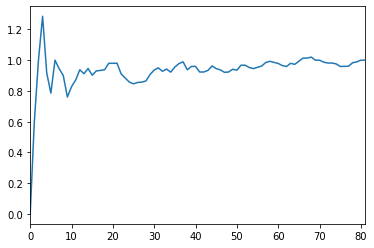

goals_against_per_game


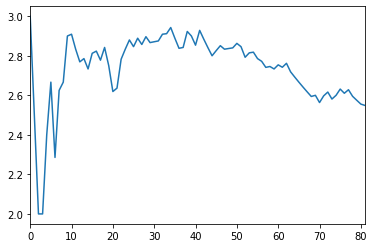

goals_for_per_game


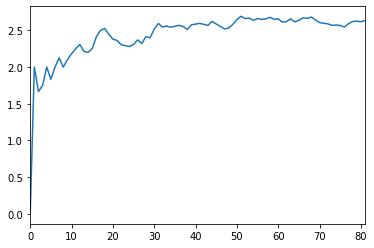

PP%


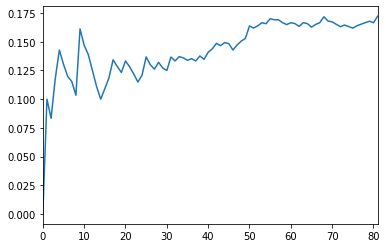

shots_for_per_game


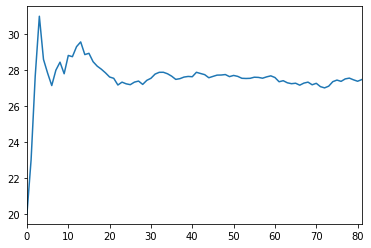

In [295]:
cols_to_plot = ['5v5_goals_for_per_goals_against', 'goals_against_per_game',
       'goals_for_per_game', 'PP%', 'shots_for_per_game'] 
for col in cols_to_plot: 
    print(col)
    df_cumulative[col].plot.line()
    plt.show()


In [290]:
df_cumulative.columns

Index(['goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities',
       'powerPlayGoals', 'giveaways', 'takeaways', 'blocked', 'goals_against',
       'strength_EvenFor', 'strength_Power Play', 'strength_Short Handed',
       'strength_EvenAgainst', 'games_played',
       '5v5_goals_for_per_goals_against', 'goals_against_per_game',
       'goals_for_per_game', 'PP%', 'shots_for_per_game'],
      dtype='object')

In [174]:
len(filtered_df.game_id.unique())

95

In [175]:
len(games_of_interest)

106

## Future Aggregation

In [ ]:
# Initialize an Empty Dataframe
data = []
cols = []
df_aggregate = pd.DataFrame(data = data, columns = cols)
id_prev = 0 

# Iterate through each game to determine cumulative statistics per game. 
for game in df_sort.game_id.unique(): 
    
    # Error Handling
    id_current = game
    if (id_current <= id_prev): # This is a check that will throw an error if - for whatever reason, we end up with game_id's that are not cumulative. 
        print("Error! Current Game ID is less than previous game id.\nCurrent Game ID: " + str(id_current) + "\nPrevious Game ID: " +str(id_prev))   
        break
    id_prev = id_current 
    
    #df_temp = df_sort[df_sort]
    # Calcuate Cumulative goals by game
    
    

In [ ]:
df_temp = pd.DataFrame(data = data, columns = cols)
game = 2011020091
df_filter = df_sort[df_sort['game_id'] < game]

df_temp['game_id'] = [game]
df_temp['goals_for'] = df_filter.goals.sum()
df_temp[]

In [296]:
pip install git+https://github.com/sat28/githubcommit.git

  Cloning https://github.com/sat28/githubcommit.git to c:\users\alexa\appdata\local\temp\pip-req-build-doevddoi
  Created wheel for githubcommit: filename=githubcommit-0.1.0-cp37-none-any.whl size=5853 sha256=dac74ee0eb1cb4746ca95a2ac146584d8c73e43717ee66bb95a9f24875d86256
  Stored in directory: C:\Users\alexa\AppData\Local\Temp\pip-ephem-wheel-cache-x_ghs0ga\wheels\9b\e7\4a\aa6a616dc7cc65dfcd309a19e5b5e1b482825457b8df38d0ca
Successfully built githubcommit


  Running command git clone -q https://github.com/sat28/githubcommit.git 'C:\Users\alexa\AppData\Local\Temp\pip-req-build-doevddoi'


Note: you may need to restart the kernel to use updated packages.


In [298]:
!jupyter serverextension enable --py githubcommit

Enabling: githubcommit
- Writing config: C:\Users\alexa\AppData\Roaming\SPB_16.6\.jupyter
    - Validating...
      githubcommit  ok


In [299]:
!jupyter nbextension install --py githubcommit --user

Installing C:\Users\alexa\Anaconda3\lib\site-packages\githubcommit\static -> githubcommit
Making directory: C:\Users\alexa\AppData\Roaming\jupyter\nbextensions\githubcommit\
Copying: C:\Users\alexa\Anaconda3\lib\site-packages\githubcommit\static\main.js -> C:\Users\alexa\AppData\Roaming\jupyter\nbextensions\githubcommit\main.js
- Validating: ok

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable githubcommit --user --py
    


In [300]:
!jupyter nbextension enable githubcommit --user --py

Enabling notebook extension githubcommit/main...
      - Validating: ok


In [ ]:
!ssh-keygen

In [1]:
!less ~/.ssh/id_rsa.pub

'less' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!git clone git@github.com:sat28/githubcommit.git



Cloning into 'githubcommit'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [8]:
!runas /noprofile /user:Administrator apt-get install git -y

In [10]:
!git clone git@github.com:alexchase1/githubcommit.git


Cloning into 'githubcommit'...
Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
